In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:

train_home_team_statistics_df = pd.read_csv('./Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./Train_Data/train_away_team_statistics_df.csv', index_col=0)


#print(train_home_team_statistics_df)

train_scores = pd.read_csv('./Y_train.csv', index_col=0)

# print(train_scores)

train_home = train_home_team_statistics_df.iloc[:,2:] #On enlève le nom de l'équipe et de la compétition

# print("Voici  train_home  : ", train_home)

train_away = train_away_team_statistics_df.iloc[:,2:]

train_home.columns = 'HOME_' + train_home.columns #on rajoute aux noms des variables home et away pour pouvoir ensuite concaténer
train_away.columns = 'AWAY_' + train_away.columns

train_data =  pd.concat([train_home,train_away],join='inner',axis=1) #on effectue une jointure pour obtenir qu'une seule table avec les infos de away et de home 

print(f"nombre de ligne de train_data: {train_data.shape[0]}")
print(f"nombre de ligne de train_scores actuellement : {train_scores.shape[0]}")

# print(train_scores)

train_scores = train_scores.loc[train_data.index] #alligne les données entre les 2 structures

print(f"nombre de ligne de train_scores après allignement : {train_scores.shape[0]}")

# print(train_scores)

#print(train_data)
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan}) # Remplacement des valeurs infinies par NaN



nombre de ligne de train_data: 12303
nombre de ligne de train_scores actuellement : 12303
nombre de ligne de train_scores après allignement : 12303


In [ ]:
train_home_team_statistics_df.head()
# print(train_home_team_statistics_df)

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [16]:
train_scores.head()

# print(train_scores)

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


## We try to model if aways win

In [17]:
train_new_y = train_scores['AWAY_WINS']


print(train_new_y)

ID
0        1
1        0
2        1
3        0
4        0
        ..
12298    1
12299    1
12300    1
12301    0
12302    0
Name: AWAY_WINS, Length: 12303, dtype: int64


## Train valid test split

In [110]:

train_home_team_statistics_df = pd.read_csv('./Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('./Y_train.csv', index_col=0)
train_home = train_home_team_statistics_df.iloc[:,2:] #On enlève le nom de l'équipe et de la compétition
train_away = train_away_team_statistics_df.iloc[:,2:]
train_home.columns = 'HOME_' + train_home.columns #on rajoute aux noms des variables home et away pour pouvoir ensuite concaténer
train_away.columns = 'AWAY_' + train_away.columns
train_data =  pd.concat([train_home,train_away],join='inner',axis=1) #on effectue une jointure pour obtenir qu'une seule table avec les infos de away et de home 
print(f"nombre de ligne de train_data: {train_data.shape[0]}")
print(f"nombre de ligne de train_scores actuellement : {train_scores.shape[0]}")
train_scores = train_scores.loc[train_data.index] #alligne les données entre les 2 structures
print(f"nombre de ligne de train_scores après allignement : {train_scores.shape[0]}")
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan}) # Remplacement des valeurs infinies par NaN



X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


nombre de ligne de train_data: 12303
nombre de ligne de train_scores actuellement : 12303
nombre de ligne de train_scores après allignement : 12303


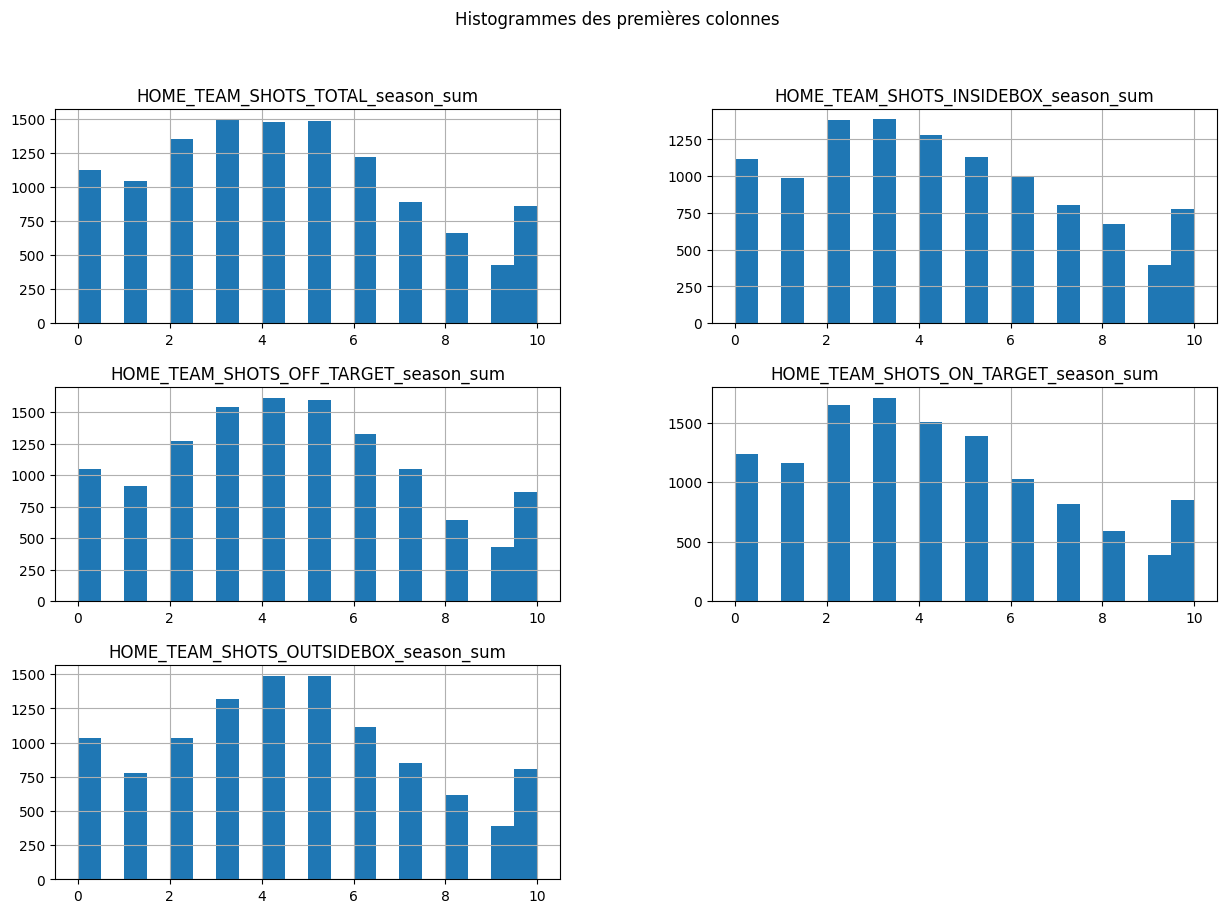

In [102]:
train_data.iloc[:, :5].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogrammes des premières colonnes')
plt.show()


## XGB model

In [50]:
params_1 = {
    'booster': 'gbtree', #Utilise des arbres de décision comme base (classic choice for many problems).
    'tree_method':'hist', #Utilise une approche basée sur des histogrammes pour accélérer l'entraînement, particulièrement efficace pour les grands ensembles de données.
    'max_depth': 8, #Contrôle la profondeur maximale des arbres.
    'learning_rate': 0.025,
    'objective': 'multi:softprob', #cela indique que le modèle doit effectuer une classification multi-classes et renvoyer les probabilités pour chaque classe.
    'num_class': 2, #On se contente juste de savoir qui gagne, sans prendre en compte les cas d'égalité pour le moment
    'eval_metric':'mlogloss'
    }



d_train = xgb.DMatrix(X_train.replace({0:np.nan}), y_train) #X (features) : Données combinées des statistiques des équipes à domicile et à l'extérieur.
                                                            #y (labels) : Résultats des matchs codés comme 0 (victoire domicile), 1 (match nul), ou 2 (victoire extérieur).
d_valid = xgb.DMatrix(X_valid.replace({0:np.nan}), y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]

bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)


[0]	train-mlogloss:0.68338	eval-mlogloss:0.68785
[1]	train-mlogloss:0.67389	eval-mlogloss:0.68266
[2]	train-mlogloss:0.66467	eval-mlogloss:0.67757
[3]	train-mlogloss:0.65574	eval-mlogloss:0.67304
[4]	train-mlogloss:0.64724	eval-mlogloss:0.66849
[5]	train-mlogloss:0.63894	eval-mlogloss:0.66438
[6]	train-mlogloss:0.63052	eval-mlogloss:0.66062
[7]	train-mlogloss:0.62230	eval-mlogloss:0.65697
[8]	train-mlogloss:0.61454	eval-mlogloss:0.65359
[9]	train-mlogloss:0.60701	eval-mlogloss:0.65015
[10]	train-mlogloss:0.59949	eval-mlogloss:0.64682
[11]	train-mlogloss:0.59224	eval-mlogloss:0.64347
[12]	train-mlogloss:0.58520	eval-mlogloss:0.64026
[13]	train-mlogloss:0.57876	eval-mlogloss:0.63741
[14]	train-mlogloss:0.57188	eval-mlogloss:0.63467
[15]	train-mlogloss:0.56536	eval-mlogloss:0.63191
[16]	train-mlogloss:0.55888	eval-mlogloss:0.62946
[17]	train-mlogloss:0.55254	eval-mlogloss:0.62681
[18]	train-mlogloss:0.54669	eval-mlogloss:0.62444
[19]	train-mlogloss:0.54078	eval-mlogloss:0.62231
[20]	train

## Matrice de confusion

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

X_test_xgb = xgb.DMatrix(X_test) 

y_pred = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bst.classes_)
disp.plot(cmap="Blues")
plt.title('Matrice de confusion')
plt.show()


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

### Accuracy on test set

A simple benchmark is always predicting home wins

In [29]:
target = train_scores.loc[X_test.index].copy()

home_wins = target
home_wins = 0 * home_wins
home_wins.iloc[:,0] = 1

res = np.round(accuracy_score(home_wins,target),4)

print(f" le résultat lorsque l'on prédit toujours une victoire de l'équipe à domicile : {res}")


 le résultat lorsque l'on prédit toujours une victoire de l'équipe à domicile : 0.4401


Using our model

In [53]:
X_test_xgb = xgb.DMatrix(X_test) 

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int).values
res = np.round(accuracy_score(predictions,target),4)

print(f"le résultat lorsqu'on prédit avec notre modèle 'basique' entrainé : {res}")

le résultat lorsqu'on prédit avec notre modèle 'basique' entrainé : 0.4742


## Submission

### On commence par crée les formats des matchs (lignes) que l'on va essayer de prédire pour ensuite appliquer le modèle dessus 

In [ ]:

test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)

X_bench = xgb.DMatrix(test_data)

predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)



predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv('./benchmark_submission_test1.csv', index=False)


              0         1
0      0.712929  0.287070
1      0.492064  0.507936
2      0.866357  0.133643
3      0.770440  0.229560
4      0.589757  0.410243
...         ...       ...
25363  0.751301  0.248699
25364  0.651296  0.348704
25365  0.901093  0.098907
25366  0.846854  0.153146
25367  0.689687  0.310313

[25368 rows x 2 columns]


# On a donc une première méthode assez naive, on va donc essayer d'améliorer notre modèle

In [89]:
train_home_team_statistics_df = pd.read_csv('./Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('./Y_train.csv', index_col=0)
train_home = train_home_team_statistics_df.iloc[:,2:] #On enlève le nom de l'équipe et de la compétition
train_away = train_away_team_statistics_df.iloc[:,2:]
train_home.columns = 'HOME_' + train_home.columns #on rajoute aux noms des variables home et away pour pouvoir ensuite concaténer
train_away.columns = 'AWAY_' + train_away.columns
train_data =  pd.concat([train_home,train_away],join='inner',axis=1) #on effectue une jointure pour obtenir qu'une seule table avec les infos de away et de home 
print(f"nombre de ligne de train_data: {train_data.shape[0]}")
print(f"nombre de ligne de train_scores actuellement : {train_scores.shape[0]}")
train_scores = train_scores.loc[train_data.index] #alligne les données entre les 2 structures
print(f"nombre de ligne de train_scores après allignement : {train_scores.shape[0]}")
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan}) # Remplacement des valeurs infinies par NaN

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


nombre de ligne de train_data: 12303
nombre de ligne de train_scores actuellement : 12303
nombre de ligne de train_scores après allignement : 12303


## TOut d'abord on s'interesse à l'importance des variables dans le modèle précédent

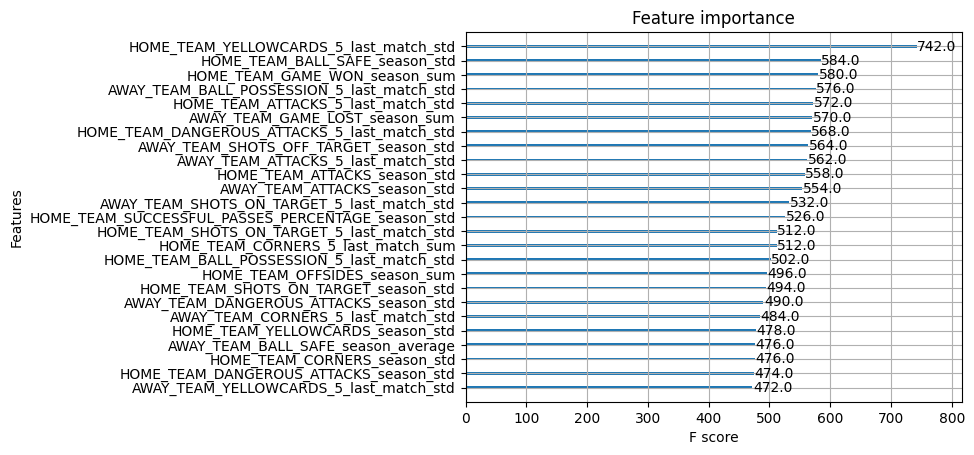

<Figure size 1500x2000 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Visualisation de l'importance des caractéristiques
xgb.plot_importance(bst, max_num_features= 25)  # Limitez à 25 caractéristiques pour plus de lisibilité
plt.figure(figsize=(15, 20))
plt.show()


## Entrainement du modèle

In [92]:
# Étape 1 : Réduction des caractéristiques avec le F-score (déjà fait dans votre code)
feature_importances = bst.get_score(importance_type='weight')
important_features = [feature for feature, score in feature_importances.items() if score > 400]
X_train_reduced = X_train[important_features]
X_valid_reduced = X_valid[important_features]  # Si vous avez une validation
X_test_reduced = X_test[important_features]

# Étape 2 : Mettre à jour les matrices DMatrix
d_train_reduced = xgb.DMatrix(X_train_reduced.replace({0: np.nan}), label=y_train)
d_valid_reduced = xgb.DMatrix(X_valid_reduced.replace({0: np.nan}), label=y_valid)

# Étape 3 : Reprendre l'entraînement avec les données réduites
params_1 = {
    'booster': 'gbtree',
    'tree_method': 'hist',
    'max_depth': 8,
    'learning_rate': 0.025,
    'objective': 'multi:softprob',
    'num_class': 2,  # Assurez-vous que cela correspond à votre problème (nombre de classes dans y_train)
    'eval_metric': 'mlogloss'
}

# Mettre à jour le nombre d'itérations et la liste d'évaluation
num_round = 10000
eval_list = [(d_train_reduced, 'train'), (d_valid_reduced, 'valid')]

# Réentraînement
bst_reduced = xgb.train(
    params_1,
    d_train_reduced,
    num_boost_round=num_round,
    
    evals=eval_list,
    early_stopping_rounds=100 # Arrêter si pas d'amélioration pendant 100 itérations
)

# bst_reduced = xgb.cv(
#     params_1,
#     d_train_reduced,
#     num_boost_round=num_round,
#     nfold=5 #pour la cross validation
#     evals=eval_list,
#     early_stopping_rounds=100 # Arrêter si pas d'amélioration pendant 100 itérations
# )

# Étape 4 : Évaluer les performances
# Si vous voulez évaluer sur le test, ajoutez ceci :
d_test_reduced = xgb.DMatrix(X_test_reduced.replace({0: np.nan}))
predictions = bst_reduced.predict(d_test_reduced)


[0]	train-mlogloss:0.68351	valid-mlogloss:0.68837
[1]	train-mlogloss:0.67438	valid-mlogloss:0.68345
[2]	train-mlogloss:0.66538	valid-mlogloss:0.67911
[3]	train-mlogloss:0.65691	valid-mlogloss:0.67447
[4]	train-mlogloss:0.64875	valid-mlogloss:0.67019
[5]	train-mlogloss:0.64119	valid-mlogloss:0.66619
[6]	train-mlogloss:0.63341	valid-mlogloss:0.66257
[7]	train-mlogloss:0.62583	valid-mlogloss:0.65897
[8]	train-mlogloss:0.61857	valid-mlogloss:0.65530
[9]	train-mlogloss:0.61191	valid-mlogloss:0.65180
[10]	train-mlogloss:0.60500	valid-mlogloss:0.64827
[11]	train-mlogloss:0.59817	valid-mlogloss:0.64521
[12]	train-mlogloss:0.59166	valid-mlogloss:0.64214
[13]	train-mlogloss:0.58545	valid-mlogloss:0.63950
[14]	train-mlogloss:0.57918	valid-mlogloss:0.63671
[15]	train-mlogloss:0.57302	valid-mlogloss:0.63384
[16]	train-mlogloss:0.56729	valid-mlogloss:0.63141
[17]	train-mlogloss:0.56158	valid-mlogloss:0.62883
[18]	train-mlogloss:0.55584	valid-mlogloss:0.62672
[19]	train-mlogloss:0.55009	valid-mloglos

## Avec cross validation

In [65]:
# Étape 1 : Réduction des caractéristiques avec le F-score (déjà fait dans votre code)
feature_importances = bst.get_score(importance_type='weight')
important_features = [feature for feature, score in feature_importances.items() if score > 400]
X_train_reduced = X_train[important_features]
X_valid_reduced = X_valid[important_features]  # Si vous avez une validation
X_test_reduced = X_test[important_features]

# Étape 2 : Mettre à jour les matrices DMatrix
d_train_reduced = xgb.DMatrix(X_train_reduced.replace({0: np.nan}), label=y_train)
d_valid_reduced = xgb.DMatrix(X_valid_reduced.replace({0: np.nan}), label=y_valid)

# Étape 3 : Reprendre l'entraînement avec les données réduites
params_1 = {
    'booster': 'gbtree',
    'tree_method': 'hist',
    'max_depth': 8,
    'learning_rate': 0.025,
    'objective': 'multi:softprob',
    'num_class': 2,  # Assurez-vous que cela correspond à votre problème (nombre de classes dans y_train)
    'eval_metric': 'mlogloss'
}

# Mettre à jour le nombre d'itérations et la liste d'évaluation
num_round = 10000
eval_list = [(d_train_reduced, 'train'), (d_valid_reduced, 'valid')]


bst_reduced = xgb.cv(
    params_1,
    d_train_reduced,
    num_boost_round=num_round,
    nfold=5, #pour la cross validation
    # evals=eval_list,
    early_stopping_rounds=100 # Arrêter si pas d'amélioration pendant 100 itérations
)

# Étape 4 : Évaluer les performances
# Si vous voulez évaluer sur le test, ajoutez ceci :
d_test_reduced = xgb.DMatrix(X_test_reduced.replace({0: np.nan}))
predictions = bst_reduced.predict(d_test_reduced)


AttributeError: 'DataFrame' object has no attribute 'predict'

## test du modèle

In [96]:
# Étape 1 : Préparer les données test réduites
d_test_reduced = xgb.DMatrix(X_test_reduced)

# Étape 2 : Faire des prédictions
# Utilisez les meilleures itérations trouvées pendant l'entraînement avec `early_stopping_rounds`
predictions = bst_reduced.predict(d_test_reduced, iteration_range=(0, bst_reduced.best_iteration))

# Étape 3 : Formater les prédictions pour les évaluer
# Si nécessaire, ajustez les colonnes pour les classes (ordre : 0, 1, 2)
predictions = pd.DataFrame(predictions)

# Ajouter une colonne 2 si elle est absente (utilisez la structure attendue par votre modèle)
# Ce cas est utile si vous avez des classes comme [0,1] au lieu de [0,1,2]
if 2 not in predictions.columns:
    predictions[2] = 0  # Ajouter une colonne pour la classe absente

# Réorganiser les colonnes si nécessaire
predictions.columns = [0, 2, 1]  # Adapter l'ordre selon votre besoin
predictions = predictions.reindex(columns=[0, 1, 2])

# Étape 4 : Transformer les prédictions en étiquettes finales
# Rank pour sélectionner la classe ayant la probabilité maximale
predictions = (predictions.rank(axis=1, ascending=False) == 1).astype(int).values

# Étape 5 : Calculer l'accuracy
from sklearn.metrics import accuracy_score

# Vérifiez que `target` contient les vraies étiquettes
res = np.round(accuracy_score(predictions, target), 4)

# Résultat
print(f"Le résultat lorsqu'on prédit avec notre modèle réduit : {res}")


Le résultat lorsqu'on prédit avec notre modèle réduit : 0.4693


## Résultat obtenu : 0.4693

## Exportation du csv

In [85]:

important_features = [feature for feature, score in feature_importances.items() if score > 400]


test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)
test_data = test_data[important_features]

X_bench = xgb.DMatrix(test_data)

predictions = bst_reduced.predict(X_bench, iteration_range=(0, bst_reduced.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv('./benchmark_submission_reduce.csv', index=False)


## On étudie ensuite la corrélation entre les variables 

In [39]:
!pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------------------- - 286.7/294.9 kB 17.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00


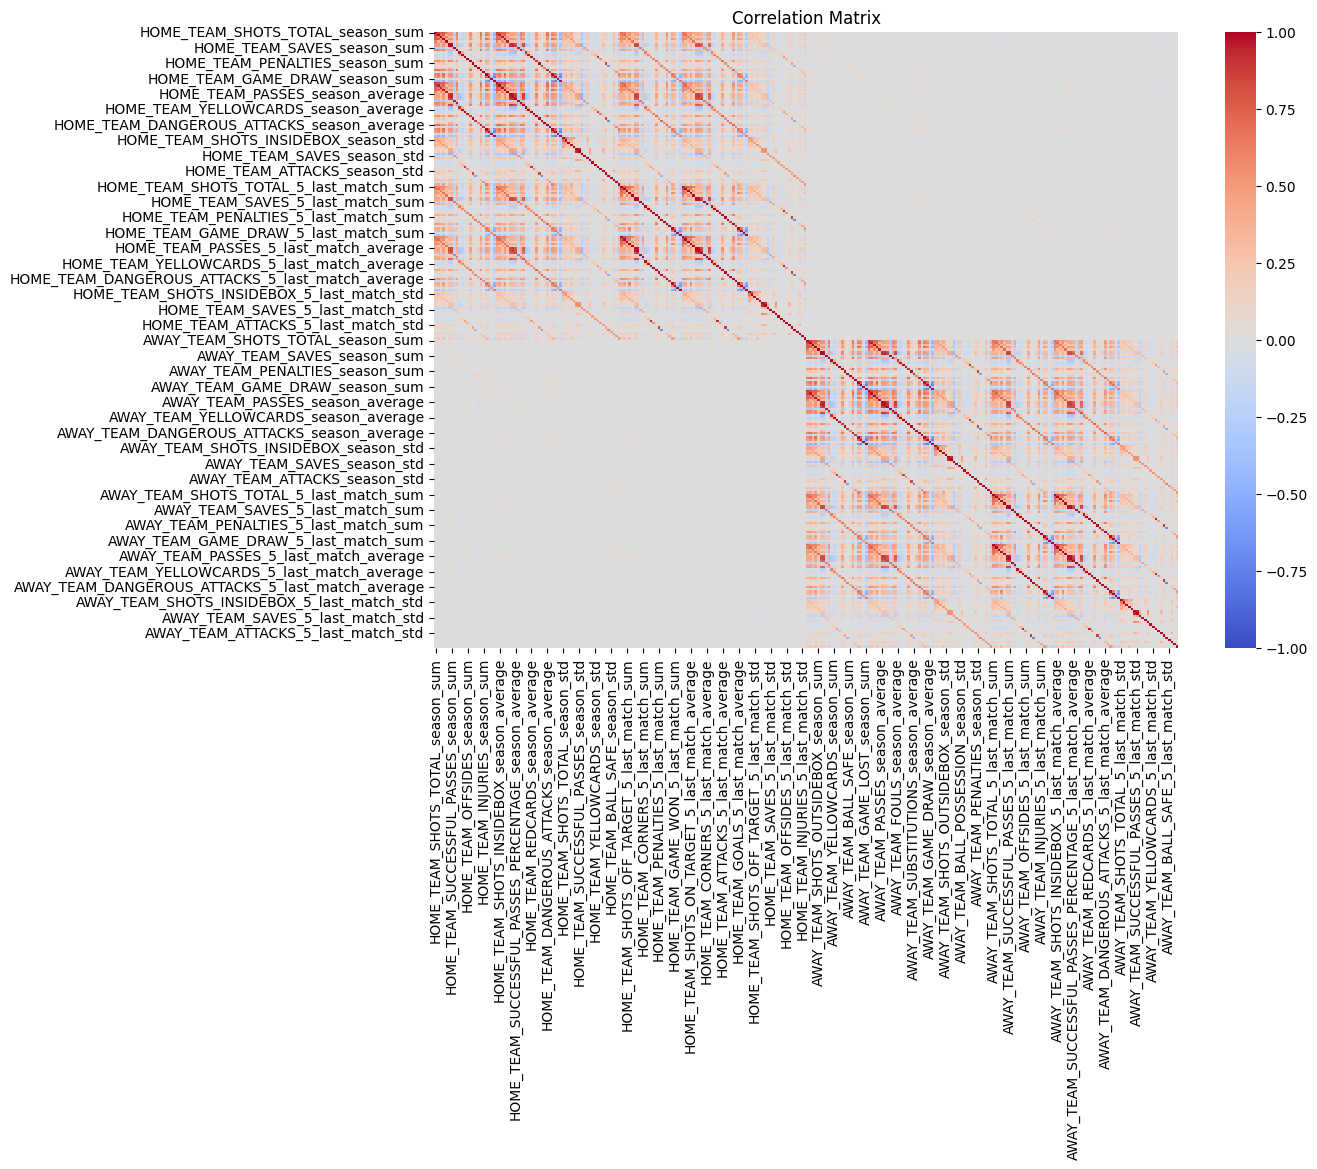

In [43]:
import seaborn as sns
import numpy as np

# Matrice de corrélation
correlation_matrix = X_train.corr()

# Affichage
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# 1. Créer une matrice de corrélation
correlation_matrix = X_train.corr().abs()

# 2. Identifier les paires corrélées (au-dessus d'un seuil de 0.85 par exemple) (On choisit 0.9 car 0.85 enleve 113 colonnes)
threshold = 0.90
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)) #np triu permet de conserver uniquement la partie supérieure de la matrice (sans les doublons ou la diagonale).

# Liste des colonnes à supprimer
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# 3. Supprimer les colonnes identifiées
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced = X_test.drop(columns=to_drop)

print(f"Colonnes supprimées : {to_drop}")
print(f"nbre de colonnes supprimées : {len(to_drop)}")


Colonnes supprimées : ['HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_PENALTIES_season_average', 'HOME_TEAM_DANGEROUS_ATTACKS_season_average', 'HOME_TEAM_GOALS_season_average', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_GAME_DRAW_season_average', 'HOME_TEAM_GAME_LOST_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_average', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_

# Etude des hyperparamètres (réalisé en enlevant les variables mises de cotés lors de F1 scores)

In [ ]:

# train_home_team_statistics_df = pd.read_csv('./Train_Data/train_home_team_statistics_df.csv', index_col=0)
# train_away_team_statistics_df = pd.read_csv('./Train_Data/train_away_team_statistics_df.csv', index_col=0)
# train_scores = pd.read_csv('./Y_train.csv', index_col=0)
# train_home = train_home_team_statistics_df.iloc[:,2:] #On enlève le nom de l'équipe et de la compétition
# train_away = train_away_team_statistics_df.iloc[:,2:]
# train_home.columns = 'HOME_' + train_home.columns #on rajoute aux noms des variables home et away pour pouvoir ensuite concaténer
# train_away.columns = 'AWAY_' + train_away.columns
# train_data =  pd.concat([train_home,train_away],join='inner',axis=1) #on effectue une jointure pour obtenir qu'une seule table avec les infos de away et de home 
# print(f"nombre de ligne de train_data: {train_data.shape[0]}")
# print(f"nombre de ligne de train_scores actuellement : {train_scores.shape[0]}")
# train_scores = train_scores.loc[train_data.index] #alligne les données entre les 2 structures
# print(f"nombre de ligne de train_scores après allignement : {train_scores.shape[0]}")
# train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan}) # Remplacement des valeurs infinies par NaN



# X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


In [70]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Étape 1 : Définir le modèle basique
xgb_clf = XGBClassifier(
    booster= 'gbtree',
    objective='multi:softprob',
    num_class= 2, 
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist',  # Optimisé pour les grands jeux de données
)

# Étape 2 : Définir la grille de recherche
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 300, 500],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5],
    
}


# Étape 3 : Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Vous pouvez changer pour 'log_loss' ou une autre métrique
    cv=3,  # Validation croisée à 3 plis
    verbose=1,
    n_jobs=-1  # Utilise tous les cœurs disponibles
)

# Étape 4 : Lancer la recherche
grid_search.fit(X_train, y_train)

# Étape 5 : Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Meilleure performance : ", grid_search.best_score_)


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
Meilleurs hyperparamètres :  {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}
Meilleure performance :  nan


In [71]:
print("Valeurs manquantes dans y_train :", y_train.isnull().sum())
print("Classes uniques dans y_train :", np.unique(y_train))


Valeurs manquantes dans y_train : 0
Classes uniques dans y_train : [0 1]


In [97]:
best_params = grid_search.best_params_  


params_1 = {
    'booster': 'gbtree',
    'tree_method': 'hist',
    'objective': 'multi:softprob',
    'num_class': 2,  # Assurez-vous que cela correspond à votre problème (nombre de classes dans y_train)
    'eval_metric': 'mlogloss',
    **best_params
}

# Mettre à jour le nombre d'itérations et la liste d'évaluation
num_round = 10000
eval_list = [(d_train_reduced, 'train'), (d_valid_reduced, 'valid')]

# Réentraînement
final_model_hyperparameter = xgb.train(
    params_1,
    d_train_reduced,
    num_boost_round=num_round,
    
    evals=eval_list,
    early_stopping_rounds=100 # Arrêter si pas d'amélioration pendant 100 itérations
)

# final_model = xgb.train(
#     objective='multi:softprob',
#     num_class= 2,
#     eval_metric='mlogloss',
#     use_label_encoder=False,
#     tree_method='hist',
#     **best_params
# )

# final_model.fit(X_train, y_train)

d_test_reduced = xgb.DMatrix(X_test_reduced.replace({0: np.nan}))
predictions_final_hyperparameter = final_model_hyperparameter.predict(d_test_reduced)



[0]	train-mlogloss:0.69119	valid-mlogloss:0.69112
[1]	train-mlogloss:0.68924	valid-mlogloss:0.68912
[2]	train-mlogloss:0.68747	valid-mlogloss:0.68732
[3]	train-mlogloss:0.68569	valid-mlogloss:0.68549
[4]	train-mlogloss:0.68391	valid-mlogloss:0.68365
[5]	train-mlogloss:0.68220	valid-mlogloss:0.68189
[6]	train-mlogloss:0.68044	valid-mlogloss:0.68008
[7]	train-mlogloss:0.67864	valid-mlogloss:0.67821
[8]	train-mlogloss:0.67694	valid-mlogloss:0.67645
[9]	train-mlogloss:0.67536	valid-mlogloss:0.67482
[10]	train-mlogloss:0.67378	valid-mlogloss:0.67317
[11]	train-mlogloss:0.67221	valid-mlogloss:0.67152
[12]	train-mlogloss:0.67063	valid-mlogloss:0.66982
[13]	train-mlogloss:0.66909	valid-mlogloss:0.66828
[14]	train-mlogloss:0.66756	valid-mlogloss:0.66669
[15]	train-mlogloss:0.66605	valid-mlogloss:0.66518
[16]	train-mlogloss:0.66453	valid-mlogloss:0.66358
[17]	train-mlogloss:0.66307	valid-mlogloss:0.66209
[18]	train-mlogloss:0.66164	valid-mlogloss:0.66060
[19]	train-mlogloss:0.66023	valid-mloglos

#### Dernière valeur : 0.56073

In [101]:
# Étape 1 : Préparer les données test réduites
d_test_reduced = xgb.DMatrix(X_test_reduced)

# Étape 2 : Faire des prédictions
# Utilisez les meilleures itérations trouvées pendant l'entraînement avec `early_stopping_rounds`
predictions = final_model_hyperparameter.predict(d_test_reduced, iteration_range=(0, final_model_hyperparameter.best_iteration))

# Étape 3 : Formater les prédictions pour les évaluer
# Si nécessaire, ajustez les colonnes pour les classes (ordre : 0, 1, 2)
predictions = pd.DataFrame(predictions)

# Ajouter une colonne 2 si elle est absente (utilisez la structure attendue par votre modèle)
# Ce cas est utile si vous avez des classes comme [0,1] au lieu de [0,1,2]
if 2 not in predictions.columns:
    predictions[2] = 0  # Ajouter une colonne pour la classe absente

# Réorganiser les colonnes si nécessaire
predictions.columns = [0, 2, 1]  # Adapter l'ordre selon votre besoin
predictions = predictions.reindex(columns=[0, 1, 2])

# Étape 4 : Transformer les prédictions en étiquettes finales
# Rank pour sélectionner la classe ayant la probabilité maximale
predictions = (predictions.rank(axis=1, ascending=False) == 1).astype(int).values

# Étape 5 : Calculer l'accuracy
from sklearn.metrics import accuracy_score

# Vérifiez que `target` contient les vraies étiquettes
res = np.round(accuracy_score(predictions, target), 4)

# Résultat
print(f"Le résultat lorsqu'on prédit avec notre modèle et les nouveaux hyperparametres : {res}")


Le résultat lorsqu'on prédit avec notre modèle et les nouveaux hyperparametres : 0.4705


### résultat : 0.4705

In [87]:


important_features = [feature for feature, score in feature_importances.items() if score > 400]


test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)
test_data = test_data[important_features]

X_bench = xgb.DMatrix(test_data)

predictions = final_model_hyperparameter.predict(X_bench, iteration_range=(0, final_model_hyperparameter.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv('./benchmark_submission_hyperparameter.csv', index=False)


## Meme chose avec Optuna pour chercher les hyperparametres

In [108]:
!pip install optuna
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import model_selection

# Séparer les données
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)

# Définir la fonction objectif pour Optuna
def objective(trial):
    # Définir l'espace de recherche des hyperparamètres
    params = {
        'booster': 'gbtree',
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class': 3,  # Nombre de classes dans y_train
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'tree_method': 'hist',  # Optimisé pour les grands jeux de données
    }

    # Entraîner le modèle XGBoost
    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=50,
        verbose=False  # Éviter l'affichage pendant les essais
    )

    # Prédictions et évaluation
    preds = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, preds)
    return accuracy

# Lancer l'optimisation
study = optuna.create_study(direction='maximize')  # Maximiser l'accuracy
study.optimize(objective, n_trials=50, timeout=3600)  # 50 essais ou 1h maximum

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", study.best_params)
print("Meilleure performance :", study.best_value)

# Réentraîner avec les meilleurs hyperparamètres
best_params = study.best_params
final_model_hyperparameter = xgb.XGBClassifier(
    **best_params,
    booster='gbtree',
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist'
)
final_model_hyperparameter.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    early_stopping_rounds=50,
    verbose=True
)

# Prédictions sur l'ensemble de test
predictions_test = final_model_hyperparameter.predict(X_test)

# Évaluation sur l'ensemble de test
test_accuracy = accuracy_score(y_test, predictions_test)
print(f"Accuracy sur l'ensemble de test : {test_accuracy:.4f}")



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[I 2024-11-26 23:28:10,010] A new study created in memory with name: no-name-d613856e-1228-4489-9df5-1e66eb47a054


[W 2024-11-26 23:28:14,306] Trial 0 failed with parameters: {'max_depth': 3, 'learning_rate': 0.03089518931962682, 'n_estimators': 632, 'subsample': 0.7723654907467217, 'colsample_bytree': 0.8486645430812669, 'gamma': 1.1736848131022222, 'min_child_weight': 10} because of the following error: ValueError("Classification metrics can't handle a mix of binary and multilabel-indicator targets").
Traceback (most recent call last):
  File "c:\Tools\Python312\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\tilia\AppData\Local\Temp\ipykernel_39276\4208041740.py", line 40, in objective
    accuracy = accuracy_score(y_valid, preds)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Tools\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Tools\Python312\Lib\site-packages\skle

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

# Cross validation